# Step 1: Dataset Overview and Selection

7.1.2. Diabetes dataset

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

Number of Instances:
442

Number of Attributes:
First 10 columns are numeric predictive values

Target:
Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:
age age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).

Source URL: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see: Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499. (https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

# Step 2: Import Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes

# Step 3: Load the Dataset 

In [33]:
diabetes = load_diabetes()
df       = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['diabetes_after_1_year'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_after_1_year
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Step 4: Exploratory Data Analysis

In [34]:
# Check for empty values
print(df.isnull().sum())
print(df.columns)

# Summary statistics
print(df.describe())

age                      0
sex                      0
bmi                      0
bp                       0
s1                       0
s2                       0
s3                       0
s4                       0
s5                       0
s6                       0
diabetes_after_1_year    0
dtype: int64
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'diabetes_after_1_year'],
      dtype='object')
                age           sex  ...            s6  diabetes_after_1_year
count  4.420000e+02  4.420000e+02  ...  4.420000e+02             442.000000
mean  -2.511817e-19  1.230790e-17  ...  1.130318e-17             152.133484
std    4.761905e-02  4.761905e-02  ...  4.761905e-02              77.093005
min   -1.072256e-01 -4.464164e-02  ... -1.377672e-01              25.000000
25%   -3.729927e-02 -4.464164e-02  ... -3.317903e-02              87.000000
50%    5.383060e-03 -4.464164e-02  ... -1.077698e-03             140.500000
75%    3.807591e-02  5.068012e-02

In [36]:
# Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    442 non-null    float64
 1   sex                    442 non-null    float64
 2   bmi                    442 non-null    float64
 3   bp                     442 non-null    float64
 4   s1                     442 non-null    float64
 5   s2                     442 non-null    float64
 6   s3                     442 non-null    float64
 7   s4                     442 non-null    float64
 8   s5                     442 non-null    float64
 9   s6                     442 non-null    float64
 10  diabetes_after_1_year  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [37]:
df.shape

(442, 11)

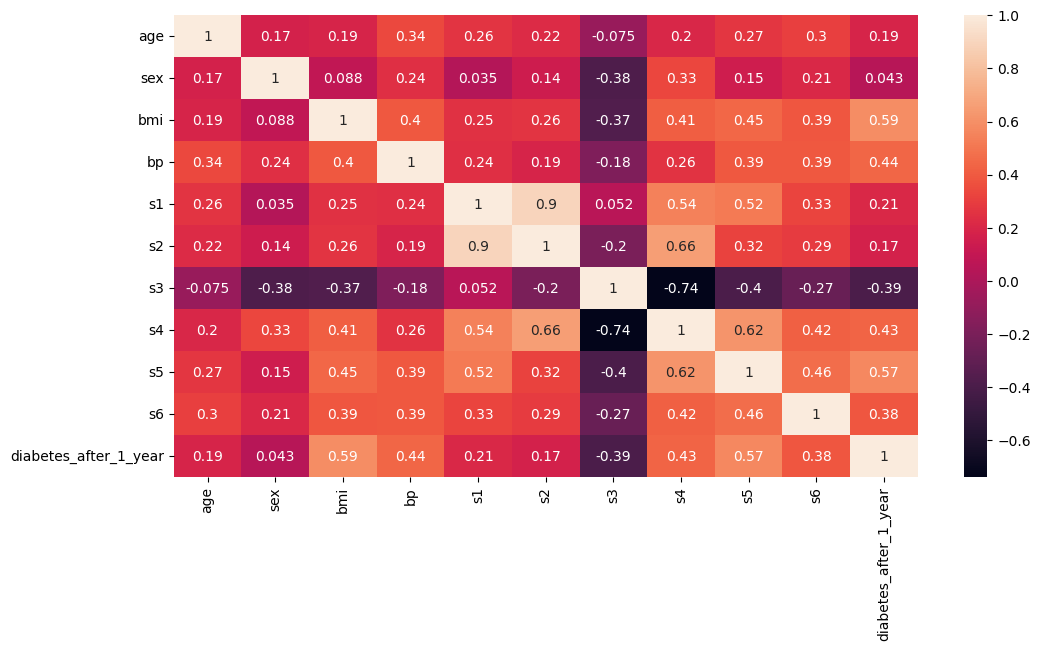

In [35]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

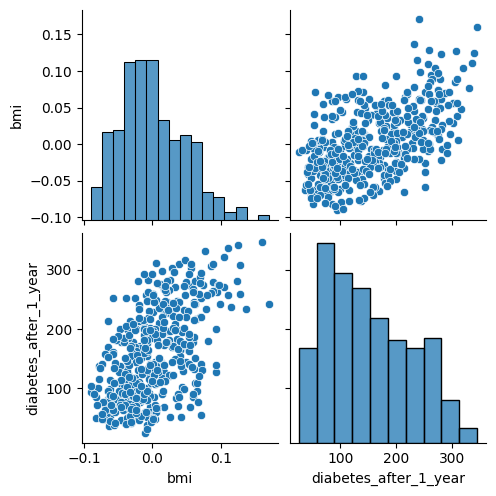

In [41]:
columns_selected = ['bmi', 'diabetes_after_1_year']
sns.pairplot(
    df,
    x_vars = columns_selected,
    y_vars = columns_selected,
)
plt.show()

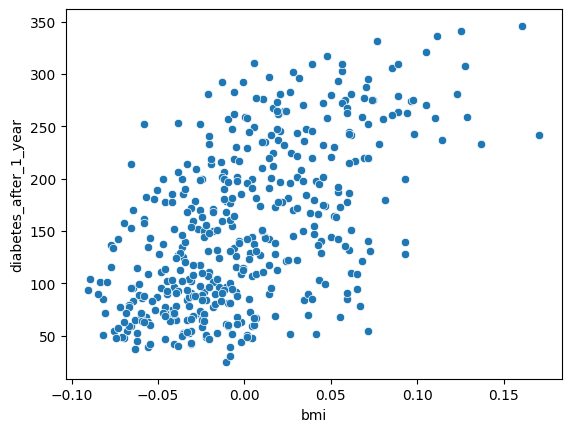

In [43]:
sns.scatterplot(df, x = df['bmi'], y = df['diabetes_after_1_year'])
plt.show()

# Step 5: Select Feature and Split the data

In [46]:
X = df[['bmi']]
y = df['diabetes_after_1_year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"\n Training set shape: {X_train.shape}")
print(f"\n Testing set shape: {X_test.shape}")


 Training set shape: (353, 1)

 Testing set shape: (89, 1)


# Step 6: Train the Model

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"\n Model Coefficient: {model.coef_[0]:.2f}")
print(f"\n Model Intercept: {model.intercept_:.2f}")


 Model Coefficient: 998.58

 Model Intercept: 152.00


# Step 7: Make Predictions

In [60]:
y_pred      = model.predict(X_test)
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
})

print(predictions.head())

     Actual   Predicted
287   219.0  145.806227
211    70.0  188.857390
72    202.0  147.958785
321   230.0  203.925298
73    111.0  131.814599


# Step 8: Visualize the Regression

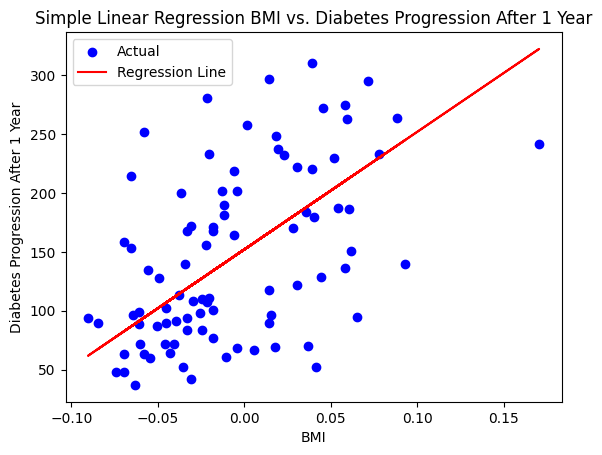

In [64]:
plt.scatter(X_test, y_test, color = 'blue', label = 'Actual')

plt.plot(X_test, y_pred, color = 'red', label = 'Regression Line')

plt.xlabel('BMI')
plt.ylabel('Diabetes Progression After 1 Year')
plt.title('Simple Linear Regression BMI vs. Diabetes Progression After 1 Year')
plt.legend()
plt.show()

# Step 9: Evaluate the Model

In [65]:
mse = mean_squared_error(y_test, y_pred)
print(f"\n Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"\n R-squared score: {r2}")


 Mean Squared Error: 4061.8259284949268

 R-squared score: 0.23335039815872138
